<a href="https://colab.research.google.com/github/ankitgurjarr/summer-training/blob/main/day7/Assignment/Compare_ANN_and_CNN_on_image_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing libraries

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import plot_model
from keras.models import load_model

from tensorflow import keras

# Gathering Dataset

### Loading the Data

In [ ]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

print("shape of x_train: ", x_train.shape)
print("shape of x_test: ", x_test.shape)
# print(x_train[1])
print(x_train.shape[0])

shape of x_train:  (60000, 28, 28)
shape of x_test:  (10000, 28, 28)
60000


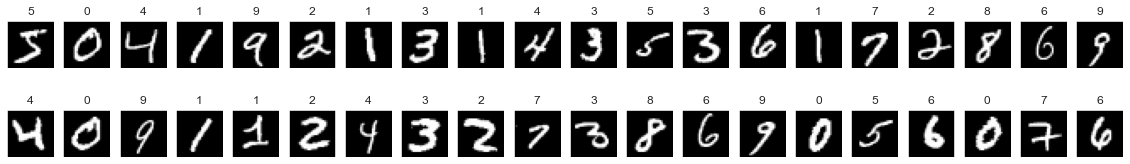

In [ ]:
fig = plt.figure(figsize=(20,3))
for i in range(40):
    ax = fig.add_subplot(2, 20, i+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]), cmap='gray')
    ax.set_title(y_train[i])

### Checking the shape of input data

In [ ]:
img_shape = x_train.shape[1:]
print(img_shape)

(28, 28)


### Build the ANN model

In [ ]:
model_ann = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation= 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

### Compile and train the model

In [ ]:
model_ann.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
r = model_ann.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20)

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2968 - accuracy: 0.9132 - val_loss: 0.1439 - val_accuracy: 0.9565
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1438 - accuracy: 0.9579 - val_loss: 0.0981 - val_accuracy: 0.9690
Epoch 3/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1079 - accuracy: 0.9677 - val_loss: 0.0857 - val_accuracy: 0.9722
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0889 - accuracy: 0.9726 - val_loss: 0.0769 - val_accuracy: 0.9761
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0752 - accuracy: 0.9760 - val_loss: 0.0787 - val_accuracy: 0.9756
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0668 - accuracy: 0.9786 - val_loss: 0.0732 - val_accuracy: 0.9771
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0587 - accuracy: 0.9813 - val_loss: 0.0706 - val_accuracy:

Plotting Loss per Iteration

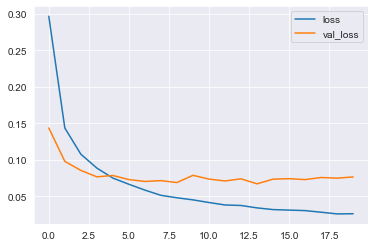

In [ ]:
plt.plot(r.history['loss'], label= 'loss')
plt.plot(r.history['val_loss'], label= 'val_loss')
plt.legend()
plt.show()

Plotting Accuracy per Iteration

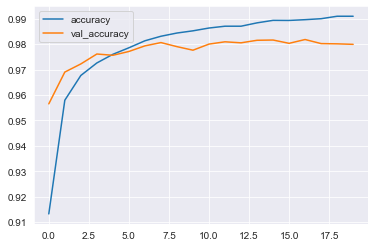

In [ ]:
plt.plot(r.history['accuracy'], label= 'accuracy')
plt.plot(r.history['val_accuracy'], label= 'val_accuracy')
plt.legend()
plt.show()

In [ ]:
print(model_ann.evaluate(x_test, y_test))

313/313 [==============================] - 0s 1ms/step - loss: 0.0768 - accuracy: 0.9799
[0.07680385559797287, 0.9799000024795532]


## Building the CNN model

In [ ]:
x_train_cnn = x_train.reshape((x_train.shape[0], x_train.shape[1], x_train.shape[2], 1))
x_test_cnn = x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2], 1))

# y_train_cnn = y_train.reshape((y_train.shape[0], y_train.shape[1], y_train.shape[2], 1))
# y_test_cnn = y_test.reshape((y_test.shape[0], y_test.shape[1], y_test.shape[2], 1))

cnn_shape = x_train_cnn.shape[1:]
print(cnn_shape)

IndexError: tuple index out of range

In [ ]:
model_cnn = Sequential()
model_cnn.add(Conv2D(32, (3,3), activation='relu', input_shape= cnn_shape))
model_cnn.add(MaxPool2D((2,2)))
model_cnn.add(Conv2D(48, (3,3), activation='relu'))
model_cnn.add(MaxPool2D((2,2)))
model_cnn.add(Dropout(0.5))
model_cnn.add(Flatten())
model_cnn.add(Dense(500, activation='relu'))
model_cnn.add(Dense(10, activation='softmax'))

In [ ]:
model_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 48)        13872     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 48)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 48)          0         
                                                                 
 flatten_1 (Flatten)         (None, 1200)             

In [ ]:
plot_model(model_cnn, 'model_cnn.jpg', show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [ ]:
model_cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

r2 = model_cnn.fit(x_train_cnn, y_train, epochs=10, batch_size=128, verbose=2, validation_split=0.1)

Epoch 1/10
422/422 - 24s - loss: 0.0793 - accuracy: 0.9746 - val_loss: 0.0361 - val_accuracy: 0.9905 - 24s/epoch - 56ms/step
Epoch 2/10
422/422 - 23s - loss: 0.0563 - accuracy: 0.9819 - val_loss: 0.0380 - val_accuracy: 0.9900 - 23s/epoch - 54ms/step
Epoch 3/10
422/422 - 22s - loss: 0.0470 - accuracy: 0.9852 - val_loss: 0.0320 - val_accuracy: 0.9905 - 22s/epoch - 53ms/step
Epoch 4/10
422/422 - 24s - loss: 0.0372 - accuracy: 0.9882 - val_loss: 0.0299 - val_accuracy: 0.9922 - 24s/epoch - 57ms/step
Epoch 5/10
422/422 - 28s - loss: 0.0335 - accuracy: 0.9889 - val_loss: 0.0271 - val_accuracy: 0.9922 - 28s/epoch - 67ms/step
Epoch 6/10
422/422 - 25s - loss: 0.0297 - accuracy: 0.9902 - val_loss: 0.0284 - val_accuracy: 0.9923 - 25s/epoch - 60ms/step
Epoch 7/10
422/422 - 24s - loss: 0.0277 - accuracy: 0.9906 - val_loss: 0.0230 - val_accuracy: 0.9933 - 24s/epoch - 57ms/step
Epoch 8/10
422/422 - 25s - loss: 0.0245 - accuracy: 0.9916 - val_loss: 0.0274 - val_accuracy: 0.9923 - 25s/epoch - 59ms/step


In [ ]:
loss, accuracy = model_cnn.evaluate(x_test_cnn, y_test, verbose=1)
print(accuracy*100)

313/313 [==============================] - 2s 5ms/step - loss: 0.0263 - accuracy: 0.9925
99.25000071525574
